##### Reuters Corpus Volume I (RCV1) Veri Seti
##### Veri seti şu adresten indirilecektir: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multilabel.html
- https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multilabel/rcv1_topics_train.txt.bz2
- https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multilabel/rcv1_topics_test.txt.bz2



### Veri seti oluşturma birleştirme ve kaydetme

In [2]:
# Eğitim ve test konu dosyalarını oku
train_topics_path = 'extracted_files/rcv1_topics_train.txt'
test_topics_path = 'extracted_files/rcv1_topics_test.txt'

# Dosyaları oku
with open(train_topics_path, 'r') as f:
    train_topics = f.readlines()
    
with open(test_topics_path, 'r') as f:
    test_topics = f.readlines()




In [3]:
# İlk birkaç örneği göster
print("İlk 5 eğitim konusu:")
for i in range(5):
    print(train_topics[i].strip())

print("\nİlk 5 test konusu:")
for i in range(5):
    print(test_topics[i].strip())


İlk 5 eğitim konusu:
2286	E11 ECAT M11 M12 MCAT	recov recov recov recov excit excit bring mexic mexic mexic mexic mexic mexic mexic mexic mexic mexic market market market market market market market life emerg evident evident econom econom econom econom back back back track buzz tuesday tuesday tuesday tuesday tuesday stock stock stock clos record record high high high interest interest interest interest rate rate rate rate rate rate rate month low low low stag begin year ahead term term term term fundament fundament fundament matthew hickm lehm brother york point point point hist hist fall fall fall view etch mind invest cris decemb free peso peso peso stubborn week week quart gross domest domest produc report percent percent percent strong strong strong anal anal expect expect expect expect expect govern treasur bill cete cete second second fell level jan main pric index rally volum frenz million shar confound strength end long long contract drop benchmark auction remain stead feder 

In [4]:
# Eğitim ve test verilerini işle
train_dataset = []
test_dataset = []

In [5]:
# Eğitim verilerini işle
for topic in train_topics:
    # Her satırı parçala
    parts = topic.strip().split('\t')
    if len(parts) >= 3:
        doc_id = parts[0]
        label = parts[1]
        text = parts[2]
        train_dataset.append({
            'id': doc_id,
            'label': label,
            'text': text
        })

In [6]:
# Test verilerini işle
for topic in test_topics:
    # Her satırı parçala 
    parts = topic.strip().split('\t')
    if len(parts) >= 3:
        doc_id = parts[0]
        label = parts[1]
        text = parts[2]
        test_dataset.append({
            'id': doc_id,
            'label': label,
            'text': text
        })

In [7]:
# Veri setlerinin ilk birkaç örneğini göster
print("Eğitim veri setinden ilk 3 örnek:")
for i in range(3):
    print(train_dataset[i])

Eğitim veri setinden ilk 3 örnek:
{'id': '2286', 'label': 'E11 ECAT M11 M12 MCAT', 'text': 'recov recov recov recov excit excit bring mexic mexic mexic mexic mexic mexic mexic mexic mexic mexic market market market market market market market life emerg evident evident econom econom econom econom back back back track buzz tuesday tuesday tuesday tuesday tuesday stock stock stock clos record record high high high interest interest interest interest rate rate rate rate rate rate rate month low low low stag begin year ahead term term term term fundament fundament fundament matthew hickm lehm brother york point point point hist hist fall fall fall view etch mind invest cris decemb free peso peso peso stubborn week week quart gross domest domest produc report percent percent percent strong strong strong anal anal expect expect expect expect expect govern treasur bill cete cete second second fell level jan main pric index rally volum frenz million shar confound strength end long long contrac

In [8]:

print("\nTest veri setinden ilk 3 örnek:")
for i in range(3):
    print(test_dataset[i])




Test veri setinden ilk 3 örnek:
{'id': '26151', 'label': 'GCAT GSPO', 'text': 'socc colomb colomb colomb colomb beat beat chil chil chil chil world world world cup cup cup qualif qualif qualif qualif halftim south south americ americ match sunday scor faustin asprill st minut minut jorg bermudez ivan zamoran penalt attend group stand tabulat play won draw lost goal goal point ecuador argentin boliv paraguay uruguay peru venezuel note top final franc brazil automat hold'}
{'id': '26152', 'label': 'GCAT GSPO', 'text': 'world world world world qualif qualif sunday minut minut won hold athlet time time time time time lucky lucky komen komen komen komen break break record record record daniel keny keny keny keny keny keny made shat noureddin morcel morcel morcel morcel morcel morcel morcel met met met met met met second second second second intern meet year year fail fail atlant olymp olymp olymp olymp clock clock clock clock set set ago mont carl blist form grand grand prix prix circuit m

In [9]:
# Eğitim ve test veri setlerini birleştir
combined_dataset = train_dataset + test_dataset

print("\nBirleştirilmiş veri setinden ilk 3 örnek:")
for i in range(3):
    print(combined_dataset[i])

print(f"\nToplam örnek sayısı: {len(combined_dataset)}")




Birleştirilmiş veri setinden ilk 3 örnek:
{'id': '2286', 'label': 'E11 ECAT M11 M12 MCAT', 'text': 'recov recov recov recov excit excit bring mexic mexic mexic mexic mexic mexic mexic mexic mexic mexic market market market market market market market life emerg evident evident econom econom econom econom back back back track buzz tuesday tuesday tuesday tuesday tuesday stock stock stock clos record record high high high interest interest interest interest rate rate rate rate rate rate rate month low low low stag begin year ahead term term term term fundament fundament fundament matthew hickm lehm brother york point point point hist hist fall fall fall view etch mind invest cris decemb free peso peso peso stubborn week week quart gross domest domest produc report percent percent percent strong strong strong anal anal expect expect expect expect expect govern treasur bill cete cete second second fell level jan main pric index rally volum frenz million shar confound strength end long lon

In [10]:
# Tekrarlı verileri kontrol et
unique_texts = set()
duplicate_count = 0

for doc in combined_dataset:
    text = doc['text']
    if text in unique_texts:
        duplicate_count += 1
    else:
        unique_texts.add(text)

print(f"Toplam örnek sayısı: {len(combined_dataset)}")
print(f"Tekrarlı örnek sayısı: {duplicate_count}")
print(f"Benzersiz örnek sayısı: {len(unique_texts)}")

if duplicate_count > 0:
    print("\nTekrarlı örneklerden bazıları:")
    seen_texts = {}
    for doc in combined_dataset:
        text = doc['text']
        if text in seen_texts:
            print(f"\nID: {doc['id']}")
            print(f"Label: {doc['label']}")
            print(f"Text: {text}")
            print(f"Daha önce görüldüğü ID: {seen_texts[text]}")
            break
        else:
            seen_texts[text] = doc['id']


Toplam örnek sayısı: 165804
Tekrarlı örnek sayısı: 7000
Benzersiz örnek sayısı: 158804

Tekrarlı örneklerden bazıları:

ID: 2289
Label: C151 C15 CCAT
Text: spun stak compan compan compan compan compan compan compan compan compan nasdaq early market market tuesday stock clos month month year year year year roll invest modest unit annual peopl larg quart quart quart quart quart quart quart quart quart produc produc produc stat report report report percent percent expect expect expect expect expect expect million million million million million million million million million million million shar shar shar shar end drop increas financ made cent cent cent cent cent cent compuserv compuserv compuserv compuserv compuserv compuserv compuserv compuserv compuserv compuserv compuserv compuserv loss loss loss loss loss loss loss loss cut cut cut cut work work forc forc continu surpris declin declin fisc fisc fisc fisc fisc blam blam numb numb numb numb subscrib subscrib subscrib subscrib subscrib

In [11]:
# Tekrarlı örnekleri sil
unique_dataset = []
seen_texts = set()

for doc in combined_dataset:
    text = doc['text']
    if text not in seen_texts:
        unique_dataset.append(doc)
        seen_texts.add(text)

# Eski veri setini güncelle
combined_dataset = unique_dataset

print(f"\nTekrarlı örnekler silindikten sonra kalan örnek sayısı: {len(combined_dataset)}")



Tekrarlı örnekler silindikten sonra kalan örnek sayısı: 158804


In [12]:
# Veri setini CSV formatına dönüştür ve kaydet
import pandas as pd

# Dictionary'leri DataFrame'e dönüştür
df = pd.DataFrame(combined_dataset)

# CSV dosyasına kaydet
df.to_csv('dataset.csv', index=False)
print("Veri seti 'dataset.csv' dosyasına kaydedildi.")


Veri seti 'dataset.csv' dosyasına kaydedildi.


### Veri Seti Ön işleme

In [106]:
# CSV dosyasını oku
df = pd.read_csv('dataset.csv')
print("Veri seti başarıyla okundu.")
print(f"Toplam örnek sayısı: {len(df)}")


Veri seti başarıyla okundu.
Toplam örnek sayısı: 158804


In [107]:
df.isnull().sum()

id       0
label    0
text     0
dtype: int64

#### Veri seti hakkında genel bilgileri göster

In [108]:
# Görselleştirme için matplotlib'i kullan
import matplotlib.pyplot as plt

In [109]:
print("\nVeri seti hakkında genel bilgiler:")
print("-" * 40)
print(df.info())


Veri seti hakkında genel bilgiler:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158804 entries, 0 to 158803
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      158804 non-null  int64 
 1   label   158804 non-null  object
 2   text    158804 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.6+ MB
None


In [110]:

print("\nVeri setinin ilk 5 satırı:")
print("-" * 40)
print(df.head())


Veri setinin ilk 5 satırı:
----------------------------------------
     id                             label  \
0  2286             E11 ECAT M11 M12 MCAT   
1  2287                          C24 CCAT   
2  2288  C151 C15 CCAT E41 ECAT GCAT GJOB   
3  2290                      C11 C22 CCAT   
4  2291                          M14 MCAT   

                                                text  
0  recov recov recov recov excit excit bring mexi...  
1  uruguay uruguay compan compan compan bring lim...  
2  spun stak compan compan compan compan compan c...  
3  compan compan limit planet planet planet plane...  
4  compan compan limit limit limit market market ...  


In [111]:
print("\nVeri setinin istatistiksel özeti:")
print("-" * 40)
print(df.describe())


Veri setinin istatistiksel özeti:
----------------------------------------
                  id
count  158804.000000
mean    86249.455203
std     48394.411479
min      2286.000000
25%     44215.750000
50%     86376.000000
75%    128212.250000
max    169854.000000


In [112]:

# Etiket dağılımını göster
print("\nEtiket dağılımı:")
print("-" * 40)
print(df['label'].value_counts())
print("\nEtiket dağılımı (yüzde):")
print(df['label'].value_counts(normalize=True) * 100)



Etiket dağılımı:
----------------------------------------
label
C151 C15 CCAT                               11751
M11 MCAT                                     7034
GCAT GSPO                                    6622
C15 C152 CCAT                                5632
M141 M14 MCAT                                5583
                                            ...  
E211 E21 E212 ECAT GCAT GPOL GWELF              1
C17 CCAT G15 G157 GCAT GHEA                     1
C13 C42 CCAT E14 E41 ECAT GCAT GJOB GPOL        1
C151 C15 CCAT E41 ECAT GCAT GJOB                1
E211 E21 ECAT GCAT GPOL GREL GVOTE              1
Name: count, Length: 6427, dtype: int64

Etiket dağılımı (yüzde):
label
C151 C15 CCAT                               7.399688
M11 MCAT                                    4.429359
GCAT GSPO                                   4.169920
C15 C152 CCAT                               3.546510
M141 M14 MCAT                               3.515655
                                              ..

#### Etiketleri Sütuna çevirme

In [113]:
# Her bir etiketin listesini oluştur
labels = []
for label_str in df['label'].str.split():
    labels.extend(label_str)
unique_labels = list(set(labels))

# Her bir etiket için yeni bir sütun oluştur ve başlangıçta 0 ile doldur
for label in unique_labels:
    df[label] = 0

# Her satır için etiketleri kontrol edip ilgili sütunları 1 yap
for idx, row in df.iterrows():
    row_labels = row['label'].split()
    for label in row_labels:
        df.at[idx, label] = 1

print("\nEtiket dönüşümü sonrası veri setinin boyutu:")
print("-" * 40)
print(df.shape)

print("\nDönüştürülmüş etiket sütunlarının ilk 5 satırı:")
print("-" * 40)
print(df[unique_labels].head())


C:\Users\engin\AppData\Local\Temp\ipykernel_12704\3531173281.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label] = 0
C:\Users\engin\AppData\Local\Temp\ipykernel_12704\3531173281.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label] = 0
C:\Users\engin\AppData\Local\Temp\ipykernel_12704\3531173281.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste


Etiket dönüşümü sonrası veri setinin boyutu:
----------------------------------------
(158804, 105)

Dönüştürülmüş etiket sütunlarının ilk 5 satırı:
----------------------------------------
   E142  GDEF  C42  M143  C331  M13  C313  G154  GCAT  E51  ...  GSCI  E61  \
0     0     0    0     0     0    0     0     0     0    0  ...     0    0   
1     0     0    0     0     0    0     0     0     0    0  ...     0    0   
2     0     0    0     0     0    0     0     0     1    0  ...     0    0   
3     0     0    0     0     0    0     0     0     0    0  ...     0    0   
4     0     0    0     0     0    0     0     0     0    0  ...     0    0   

   C183  C21  ECAT  G15  GWELF  GPOL  M131  GFAS  
0     0    0     1    0      0     0     0     0  
1     0    0     0    0      0     0     0     0  
2     0    0     1    0      0     0     0     0  
3     0    0     0    0      0     0     0     0  
4     0    0     0    0      0     0     0     0  

[5 rows x 102 columns]


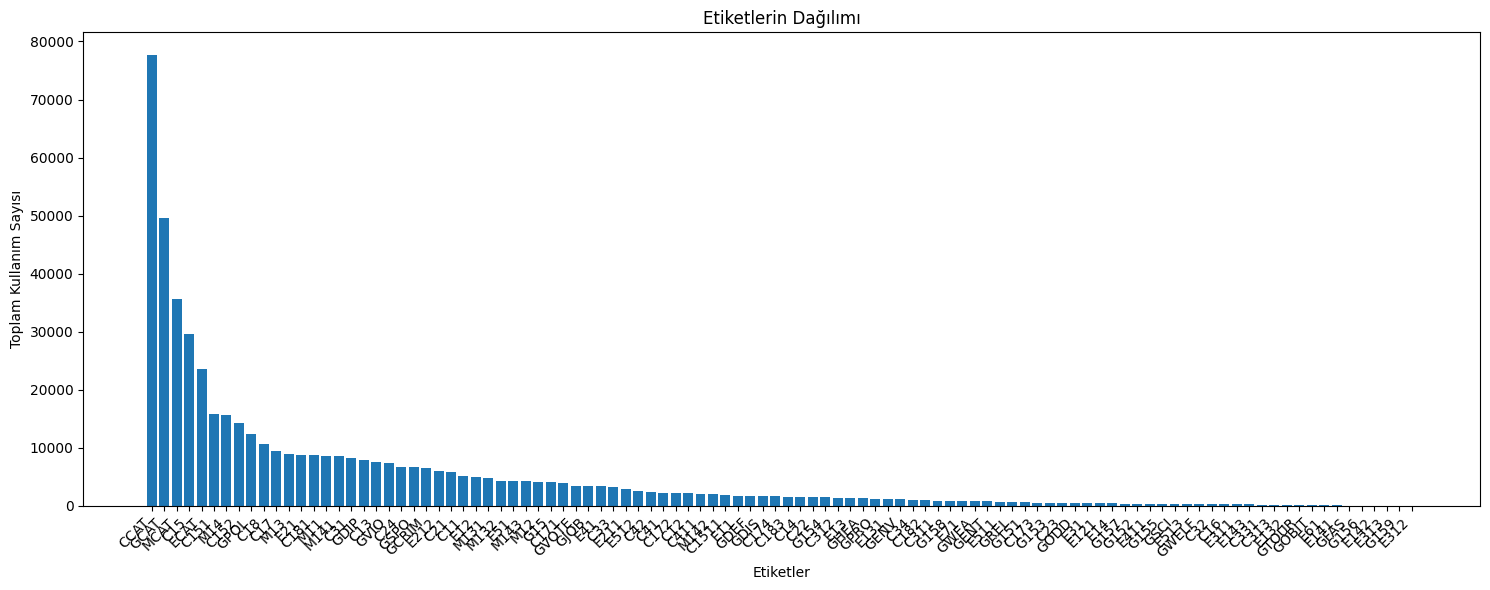


Etiketlerin kullanım sayıları:
----------------------------------------
CCAT    77690
GCAT    49554
MCAT    35631
C15     29535
ECAT    23664
        ...  
G156       52
E142       42
E313       18
G159       12
E312        8
Length: 102, dtype: int64


In [114]:
# Etiket sütunlarındaki 1'lerin toplamını hesapla
label_counts = df[unique_labels].sum().sort_values(ascending=False)



plt.figure(figsize=(15, 6))
plt.bar(label_counts.index, label_counts.values)
plt.title('Etiketlerin Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('Toplam Kullanım Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Sayısal değerleri de göster
print("\nEtiketlerin kullanım sayıları:")
print("-" * 40)
print(label_counts)


In [115]:
# C18 ve alt etiketlerinin toplam kullanım sayısını göster
c18_labels = [col for col in df.columns if col.startswith('C18')]
c18_counts = df[c18_labels].sum().sort_values(ascending=False)

print("\nC18 ve alt etiketlerinin toplam kullanım sayıları:")
print("-" * 40)
print(c18_counts)



C18 ve alt etiketlerinin toplam kullanım sayıları:
----------------------------------------
C18     10718
C181     8821
C183     1562
C182      949
dtype: int64


C:\Users\engin\AppData\Local\Temp\ipykernel_12704\3662720926.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[category] = 0
C:\Users\engin\AppData\Local\Temp\ipykernel_12704\3662720926.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[category] = 0
C:\Users\engin\AppData\Local\Temp\ipykernel_12704\3662720926.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

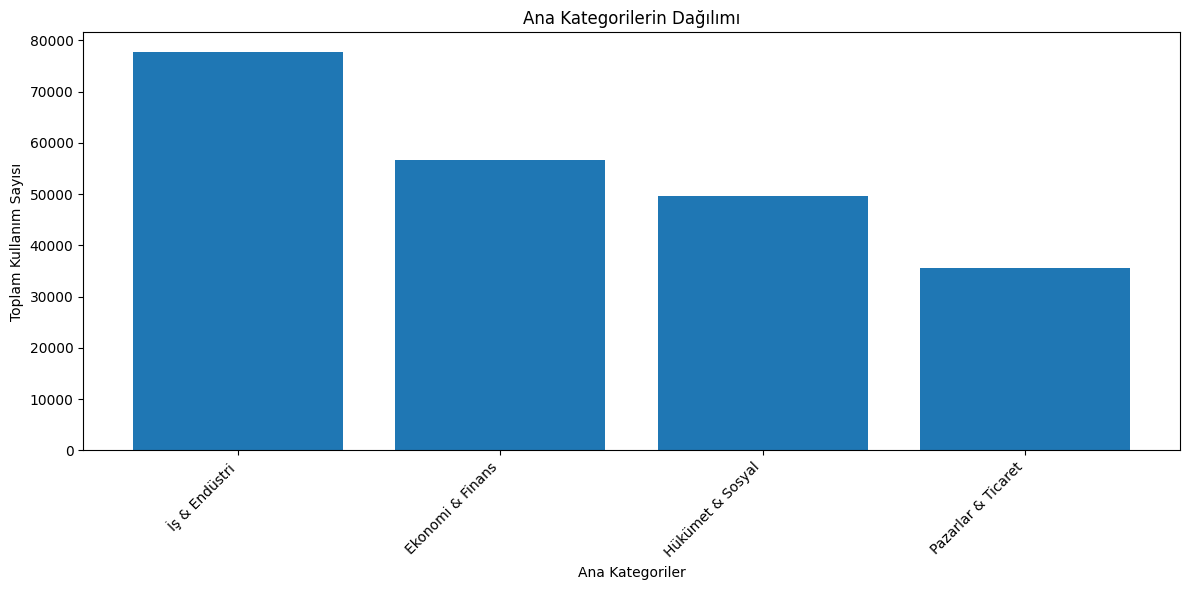


Ana kategorilerin kullanım sayıları:
----------------------------------------
İş & Endüstri         77690
Ekonomi & Finans      56751
Hükümet & Sosyal      49554
Pazarlar & Ticaret    35631
dtype: int64


In [116]:
# Etiketleri ana kategorilere göre gruplandır
category_mapping = {
    'CCAT': 'İş & Endüstri',
    'ECAT': 'Ekonomi & Finans', 
    'GCAT': 'Hükümet & Sosyal',
    'MCAT': 'Pazarlar & Ticaret'
}

# Ana kategori sütunlarını oluştur
main_categories = list(set(category_mapping.values()))
for category in main_categories:
    df[category] = 0

# Alt etiketleri ana kategorilere dönüştür
for idx, row in df.iterrows():
    for label in unique_labels:
        # Teknoloji etiketlerini İş & Endüstri'ye ekle
        if (label.startswith('C18') or label.startswith('C23') or 
            label.startswith('C26') or label.startswith('C46') or
            label.startswith('C')):
            if row[label] == 1:
                df.at[idx, 'İş & Endüstri'] = 1
        elif label.startswith('E') or (label.startswith('M') and label <= 'M25'):
            if row[label] == 1:
                df.at[idx, 'Ekonomi & Finans'] = 1
        elif label.startswith('G'):
            if row[label] == 1:
                df.at[idx, 'Hükümet & Sosyal'] = 1
        elif label.startswith('M') and label >= 'M35':
            if row[label] == 1:
                df.at[idx, 'Pazarlar & Ticaret'] = 1

# Ana kategorilerin dağılımını göster
main_category_counts = df[main_categories].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(main_category_counts.index, main_category_counts.values)
plt.title('Ana Kategorilerin Dağılımı')
plt.xlabel('Ana Kategoriler')
plt.ylabel('Toplam Kullanım Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nAna kategorilerin kullanım sayıları:")
print("-" * 40)
print(main_category_counts)


In [117]:
# Tüm ana kategorilerin 1 olduğu satırların sayısını bul
all_categories_count = df[df[main_categories].all(axis=1)].shape[0]

print("\nTüm ana kategorilerin aynı anda 1 olduğu haber sayısı:", all_categories_count)
print(f"Bu sayı toplam {len(df)} haberin %{(all_categories_count/len(df)*100):.2f}'ine denk gelmektedir.")



Tüm ana kategorilerin aynı anda 1 olduğu haber sayısı: 494
Bu sayı toplam 158804 haberin %0.31'ine denk gelmektedir.



Ana kategoriler arasındaki kesişim sayıları:
------------------------------------------------------------
                   Hükümet & Sosyal Ekonomi & Finans Pazarlar & Ticaret  \
Hükümet & Sosyal              49554             8703               1316   
Ekonomi & Finans               8703            56751              35519   
Pazarlar & Ticaret             1316            35519              35631   
İş & Endüstri                  9334            10684               4919   

                   İş & Endüstri  
Hükümet & Sosyal            9334  
Ekonomi & Finans           10684  
Pazarlar & Ticaret          4919  
İş & Endüstri              77690  


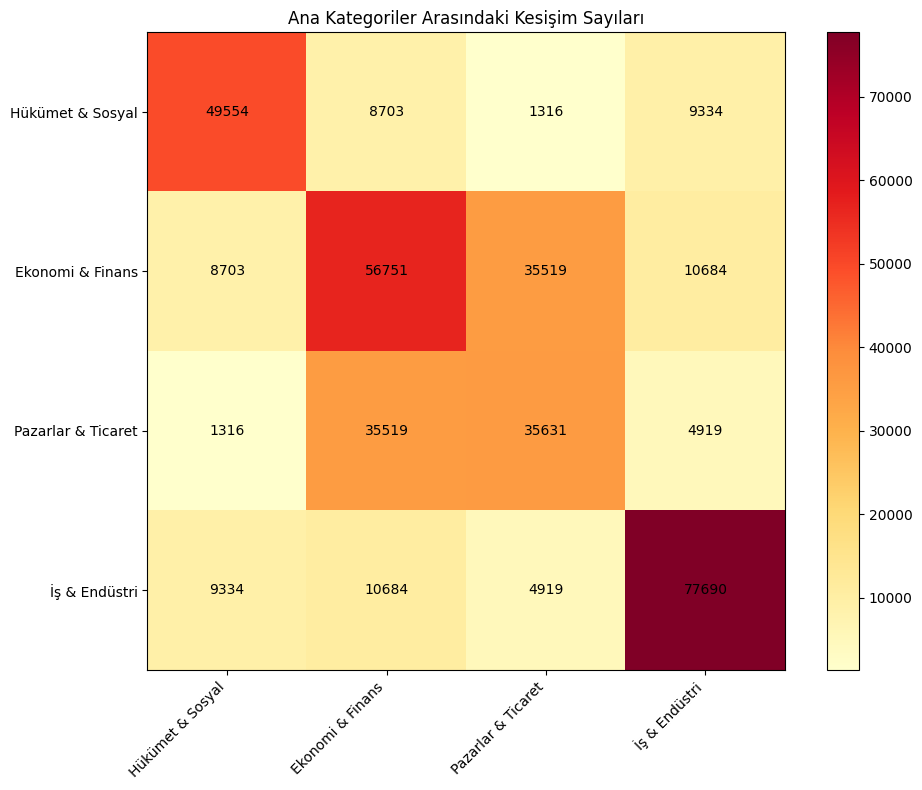

In [118]:
# Ana kategoriler arasındaki kesişimleri hesapla
intersection_matrix = pd.DataFrame(index=main_categories, columns=main_categories)

for cat1 in main_categories:
    for cat2 in main_categories:
        # İki kategorinin her ikisinde de 1 olan satır sayısını bul
        intersection_count = df[(df[cat1] == 1) & (df[cat2] == 1)].shape[0]
        intersection_matrix.at[cat1, cat2] = intersection_count

print("\nAna kategoriler arasındaki kesişim sayıları:")
print("-" * 60)
print(intersection_matrix)

# Görselleştirme için heatmap
plt.figure(figsize=(10, 8))
# Convert DataFrame to numeric values for heatmap
intersection_matrix_values = intersection_matrix.astype(float).values
plt.imshow(intersection_matrix_values, cmap='YlOrRd')
plt.colorbar()

# Eksen etiketlerini ayarla
plt.xticks(range(len(main_categories)), main_categories, rotation=45, ha='right')
plt.yticks(range(len(main_categories)), main_categories)

# Hücre değerlerini ekle
for i in range(len(main_categories)):
    for j in range(len(main_categories)):
        plt.text(j, i, int(intersection_matrix.iloc[i, j]), 
                ha='center', va='center')

plt.title('Ana Kategoriler Arasındaki Kesişim Sayıları')
plt.tight_layout()
plt.show()


In [119]:
# Metin örneklerini göster
print("\nHaber metinlerinden örnekler:")
print("-" * 60)
for i in range(5):  # İlk 5 örneği göster
    print(f"\nÖrnek {i+1}:")
    print(df['text'].iloc[i])
    print("-" * 60)



Haber metinlerinden örnekler:
------------------------------------------------------------

Örnek 1:
recov recov recov recov excit excit bring mexic mexic mexic mexic mexic mexic mexic mexic mexic mexic market market market market market market market life emerg evident evident econom econom econom econom back back back track buzz tuesday tuesday tuesday tuesday tuesday stock stock stock clos record record high high high interest interest interest interest rate rate rate rate rate rate rate month low low low stag begin year ahead term term term term fundament fundament fundament matthew hickm lehm brother york point point point hist hist fall fall fall view etch mind invest cris decemb free peso peso peso stubborn week week quart gross domest domest produc report percent percent percent strong strong strong anal anal expect expect expect expect expect govern treasur bill cete cete second second fell level jan main pric index rally volum frenz million shar confound strength end long lo

In [120]:
# Tekrar eden kelimeleri düzeltme
def remove_repeated_words(text):
    if pd.isna(text):
        return text
        
    # Kelimeleri boşluklara göre ayır
    words = text.split()
    
    # Ardışık tekrar eden kelimeleri kaldır
    cleaned_words = []
    prev_word = None
    
    for word in words:
        if word != prev_word:
            cleaned_words.append(word)
        prev_word = word
    
    # Kelimeleri tekrar birleştir
    return ' '.join(cleaned_words)

# Text sütununa düzeltmeyi uygula
df['text'] = df['text'].apply(remove_repeated_words)

print("\nTekrar eden kelimeler düzeltildikten sonra örnekler:")
print("-" * 60)
for i in range(5):  # İlk 5 örneği göster
    print(f"\nÖrnek {i+1}:")
    print(df['text'].iloc[i])
    print("-" * 60)



Tekrar eden kelimeler düzeltildikten sonra örnekler:
------------------------------------------------------------

Örnek 1:
recov excit bring mexic market life emerg evident econom back track buzz tuesday stock clos record high interest rate month low stag begin year ahead term fundament matthew hickm lehm brother york point hist fall view etch mind invest cris decemb free peso stubborn week quart gross domest produc report percent strong anal expect govern treasur bill cete second fell level jan main pric index rally volum frenz million shar confound strength end long contract drop benchmark auction remain stead feder reserv refrain rais short attract off robust return foreign grow confid victim crumbl focus lar schonand head research santand city continu declin inflat gdp growth figur lack upward move fact play felix boni jame capel posit technic uncertain argentin put neighbor brazil risk south americ wary lot hyp export led patch consum venge corpor earn justif run
---------------

In [121]:
df.head()

,id,label,text,E142,GDEF,C42,M143,C331,M13,C313,...,ECAT,G15,GWELF,GPOL,M131,GFAS,Hükümet & Sosyal,Ekonomi & Finans,Pazarlar & Ticaret,İş & Endüstri
0,2286,E11 ECAT M11 M12 MCAT,recov excit bring mexic market life emerg evid...,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,2287,C24 CCAT,uruguay compan bring limit mexic capac grab ma...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2288,C151 C15 CCAT E41 ECAT GCAT GJOB,spun stak compan nasdaq early market tuesday s...,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,2290,C11 C22 CCAT,compan limit planet hollywood launch credit ca...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2291,M14 MCAT,compan limit market small emerg tuesday clos h...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [123]:
# Sadece belirtilen sütunları tut
columns_to_keep = ['Hükümet & Sosyal', 'Ekonomi & Finans', 'Pazarlar & Ticaret', 'İş & Endüstri', 'text']
df = df[columns_to_keep]



cols = df.columns.tolist()
cols = ['text'] + [col for col in cols if col != 'text']
df = df[cols]

print("\nSütunların yeni sırası:")
print(df.columns.tolist())
print("\nVeri setinin ilk birkaç satırı:")
df.head()



Sütunların yeni sırası:
['text', 'Hükümet & Sosyal', 'Ekonomi & Finans', 'Pazarlar & Ticaret', 'İş & Endüstri']

Veri setinin ilk birkaç satırı:


,text,Hükümet & Sosyal,Ekonomi & Finans,Pazarlar & Ticaret,İş & Endüstri
0,recov excit bring mexic market life emerg evid...,0,1,1,0
1,uruguay compan bring limit mexic capac grab ma...,0,0,0,1
2,spun stak compan nasdaq early market tuesday s...,1,1,0,1
3,compan limit planet hollywood launch credit ca...,0,0,0,1
4,compan limit market small emerg tuesday clos h...,0,1,1,0


In [124]:
# Veri setini CSV olarak kaydet
df.to_csv('preprocessed_dataset_3.csv', index=False)
print("\nVeri seti 'preprocessed_dataset_3.csv' olarak kaydedildi.")



Veri seti 'preprocessed_dataset_3.csv' olarak kaydedildi.
